# 02 Replication Results: 1968-2009

## 1. Cross-sectional analysis

Replicate the cross-sectional asset pricing results in the first, fifth, and
sixth columns of Table III, and Figures 4 and 5 of the article using only the equity portfolios as test
assets. Data on the Treasury bond portfolios is not freely available and should be ignored.
- 25 Portfolios Formed on Size & BM 
- 10 Portfolios Formed on Momentum， Download 10 Portfolios Formed on Momentum from [link](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) 
- Seasonal compounded return，monthly return -> seasonal return, Resample to season
- FF 3-factors
- FF Mom factor
- $R_{i,t}^{excess} = R_{i,t}^{raw} - R_{f,t}$

### 25 Portfolios Formed on Size & BM 

In [1]:
import pandas as pd
import numpy as np
test_25 = pd.read_csv('datasets/25_Portfolios_5x5.csv', skiprows=15, index_col=0)
test_25.index = pd.to_datetime(test_25.index, format='%Y%m')
test_25.columns = [i.replace('SMALL HiBM', 'S1 B5').replace('SMALL LoBM', 'S1 B1').replace('BIG LoBM', 'S5 B1').replace('BIG HiBM', 'S5 B5').replace('BM', 'B').replace('ME', 'S').replace(' ', '') for i in test_25.columns]
test_25 = test_25 / 100.0
test_25.head(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,S4B1,S4B2,S4B3,S4B4,S4B5,S5B1,S5B2,S5B3,S5B4,S5B5
1926-07-01,0.058276,-0.017006,0.005118,-0.021477,0.019583,0.012118,0.024107,0.006056,-0.026082,-0.004527,...,0.015376,0.015460,0.013389,0.002765,0.024678,0.033248,0.060909,0.020285,0.031263,0.005623
1926-08-01,-0.020206,-0.080282,0.013968,0.021483,0.085104,0.023620,-0.007525,0.038984,0.002299,0.062937,...,0.013858,0.038587,0.019738,0.021336,0.053422,0.010169,0.041975,0.019769,0.054924,0.077576
1926-09-01,-0.048291,-0.026806,-0.043417,-0.032683,0.008586,-0.026849,-0.005252,0.010789,-0.032877,-0.009419,...,0.016897,-0.005246,-0.017724,0.014806,0.008730,-0.012951,0.036610,0.001384,-0.007497,-0.024284


### 10 Portfolios Formed on Momentum
Download 10 Portfolios Formed on Momentum from [link](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) 

In [2]:
test_10 = pd.read_csv('datasets/10_Portfolios_Prior_12_2.csv', skiprows=10, index_col=0)
test_10.index = pd.to_datetime(test_10.index, format='%Y%m')
test_10.columns = [i.replace('PRIOR', 'Mom').replace('Lo Mom', 'Mom 1').replace('Hi Mom', 'Mom 10') for i in test_10.columns]
test_10 = test_10 / 100.0
test_10.head(3)

,Mom 1,Mom 2,Mom 3,Mom 4,Mom 5,Mom 6,Mom 7,Mom 8,Mom 9,Mom 10
1927-01-01,-0.0332,-0.0454,0.0267,-0.0029,-0.0041,0.0093,0.0030,0.0071,-0.0014,-0.0024
1927-02-01,0.0739,0.0601,0.0703,0.0746,0.0434,0.0398,0.0299,0.0320,0.0414,0.0704
1927-03-01,-0.0323,-0.0305,-0.0384,-0.0480,-0.0046,-0.0235,0.0196,0.0049,0.0035,0.0613


In [3]:
test_assets = pd.concat([test_25, test_10], axis=1).sort_index().dropna()

### Seasonal compounded return
将月度回报转换为季度回报 (复利计算)， 重采样 (Resample) 到季度

In [4]:
def compound_returns(x):
    # (1+r1)*(1+r2)*(1+r3) - 1
    return (1 + x).prod() - 1

# 重采样 (Resample) 到季度
# 'Q' 代表季度末，apply 会对每个季度的 3 个月数据应用上面的函数
test_assets_quarterly = test_assets.resample('Q-JAN').apply(compound_returns)
test_assets_quarterly.index = test_assets_quarterly.index.to_period('Q')

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/1777012129.py:7: FutureWarning: 'Q-JAN' is deprecated and will be removed in a future version, please use 'QE-JAN' instead.
  test_assets_quarterly = test_assets.resample('Q-JAN').apply(compound_returns)


### FF 3-factors model

In [5]:
ff_factors = pd.read_csv('datasets/F-F_Research_Data_Factors.csv', skiprows=4, index_col=0)
ff_factors.index = pd.to_datetime(ff_factors.index, format='%Y%m')
ff_factors = ff_factors/100.0
ff_factors_quarterly = ff_factors.resample('Q-JAN').apply(compound_returns)
ff_factors_quarterly.index = ff_factors_quarterly.index.to_period('Q')
ff_factors_quarterly.to_csv('tables/ff_factors_quarterly.csv')
ff_factors_quarterly.head()

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/748092038.py:4: FutureWarning: 'Q-JAN' is deprecated and will be removed in a future version, please use 'QE-JAN' instead.
  ff_factors_quarterly = ff_factors.resample('Q-JAN').apply(compound_returns)


,Mkt-RF,SMB,HML,RF
1926Q3,0.028900,-0.025500,-0.023900,0.002200
1926Q4,-0.003391,-0.026210,0.047136,0.008021
1927Q1,0.051739,-0.004993,0.040044,0.008423
1927Q2,0.048061,-0.013179,0.009271,0.008122
1927Q3,0.104138,-0.012697,0.018336,0.008625


### FF Mom factor

In [6]:
ff_Mom = pd.read_csv('datasets/F-F_Momentum_Factor.csv', index_col=0)
ff_Mom.index = pd.to_datetime(ff_Mom.index, format='%Y%m')
ff_Mom = ff_Mom/100.0
ff_Mom_quarterly = ff_Mom.resample('Q-JAN').apply(compound_returns)
ff_Mom_quarterly.index = ff_Mom_quarterly.index.to_period('Q')
ff_Mom_quarterly.to_csv('tables/ff_Mom_quarterly.csv')
ff_Mom_quarterly.head(3)

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/1111381081.py:4: FutureWarning: 'Q-JAN' is deprecated and will be removed in a future version, please use 'QE-JAN' instead.
  ff_Mom_quarterly = ff_Mom.resample('Q-JAN').apply(compound_returns)


,Mom
1927Q1,0.005700
1927Q2,0.064130
1927Q3,0.077065


### Revise excess return

资产定价模型（如 CAPM, FF3, 或 Adrian et al. 2014）解释的是**“风险溢价” (Risk Premia)**，即超过无风险利率的那部分回报。
$R_{i,t}^{excess} = R_{i,t}^{raw} - R_{f,t}$

In [7]:
# 1. 确保 RF 也是季度复利的
# ff_factors_quarterly 应该包含 'Mkt-RF', 'SMB', 'HML', 'RF'
rf_quarterly = ff_factors_quarterly['RF']

# 2. 计算超额收益 (Excess Returns)
# 对 35 个测试资产的每一列，都减去对应的季度 RF
test_assets_excess = test_assets_quarterly.subtract(rf_quarterly, axis=0)
test_assets_excess.to_csv('tables/TestAssetsExcess.csv')

### Load LevFac data

In [8]:
# 定义一个简单的解析器
def parse_quarter(date_str):
    # 将 "1968Q1" 转换为 Pandas 的 Period 对象
    return pd.Period(date_str, freq='Q')

# 读取时直接应用
ori_data = pd.read_csv(
    'tables/OriData.csv',
    index_col=0,           # 假设第一列是索引
    converters={0: parse_quarter} # 对第0列（索引列）应用解析器
)

ori_data.head()

,FL664090005.Q,FL663020003.Q,FL664004005.Q,FL663069103.Q,FL663061105.Q,FL663061703.Q,FL663062003.Q,FL663063005.Q,FL663069803.Q,FL663064003.Q,...,FL663193005.Q,tot_asset,tot_liabilities,Leverage,LevFac,LogLev,Z-LevFac,Z-LogLev,No Seasonal-Adj LevFac,No Seasonal-Adj LogLev
DATES,,,,,,,,,,,,,,,,,,,,,
1968Q1,13602,1124,2509,0,968,0,454,1087,0,1376,...,570,13602,13000,22.594684,0.010283,3.117715,-0.149858,0.548915,-1.151644,0.548915
1968Q2,15112,1274,2305,0,905,0,669,731,0,1019,...,551,15112,14439,22.454681,0.037533,3.111499,0.052167,0.539366,0.014206,0.539366
1968Q3,17661,1398,4211,0,2543,0,663,1005,0,1293,...,535,17661,16925,23.995924,0.226723,3.177884,1.454775,0.641359,0.508722,0.641359
1968Q4,18513,1465,3534,0,1766,0,548,1220,0,1509,...,527,18513,17690,22.494532,-0.063279,3.113272,-0.695224,0.542090,-0.383556,0.542090
1969Q1,14615,1487,1823,0,733,0,345,745,0,1034,...,521,14615,13739,16.683790,-0.088941,2.814438,-0.885478,0.082964,-1.978957,0.082964


In [9]:
LevFac = ori_data['LevFac'] 
LevFac.name = 'LevFac'

In [10]:
merged_data = pd.concat([test_assets_excess, ff_factors_quarterly, LevFac, ff_Mom_quarterly['Mom']], axis=1).sort_index().dropna()
merged_data.head(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,Mom 7,Mom 8,Mom 9,Mom 10,Mkt-RF,SMB,HML,RF,LevFac,Mom
1968Q1,0.145750,0.161707,0.095155,0.100281,0.147197,0.072070,0.030742,0.113591,0.071723,0.111765,...,-0.027698,-0.028932,-0.005171,0.014996,-0.007370,0.100319,0.025006,0.010940,0.010283,-0.001998
1968Q2,0.061104,0.082428,0.085702,0.048030,0.073554,0.082127,0.038624,0.058326,0.057274,0.050667,...,0.062778,0.080956,0.100851,0.100959,0.051630,0.012204,-0.005143,0.012048,0.037533,0.048403
1968Q3,0.029377,0.061484,0.062088,0.120255,0.113479,-0.003864,0.049049,0.028419,0.066994,0.057416,...,-0.052726,-0.007781,-0.016576,0.046364,0.002254,0.047301,0.068743,0.013662,0.226723,0.006775


### Table III

$$R_{i,t}^e = \alpha_i + \beta_i' * f_t + \epsilon_{i, t},   i=1,\dots, N, t=1,\dots, T$$
在主回归分析中（主要结果）：使用全样本固定 Beta (One-time Beta)在检验标准测试资产（如 Fama-French 25 个投资组合、动量组合、债券组合）的定价能力时，作者使用的是全样本时间序列回归得到的固定 Beta。原文显示，Beta 是通过对 $t=1,...,T$（整个样本期，通常是 1968-2009）进行一次性时间序列回归估算出来的。随后，这些固定 Beta 被用于横截面回归（Fama-MacBeth 第二步）来估计风险溢价。

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ==========================================
# 1. 核心回归函数 (保持不变)
# ==========================================
def run_asset_pricing_model(factors, portfolios, model_name):
    # 确保因子包含截距用于时间序列回归 (Time-Series Regression)
    X_ts = sm.add_constant(factors)
    
    # --- Step 1: Get Betas ---
    betas_list = []
    for port in portfolios.columns:
        model_ts = sm.OLS(portfolios[port], X_ts).fit()
        betas_list.append(model_ts.params[factors.columns]) # 只取因子Beta
    
    beta_df = pd.DataFrame(betas_list, index=portfolios.columns)
    
    # --- Step 2: Get Lambdas (Cross-Sectional Regression) ---
    avg_returns = portfolios.mean()
    X_xs = sm.add_constant(beta_df) # 加入截距 Lambda_0
    model_xs = sm.OLS(avg_returns, X_xs).fit()
    
    # --- Step 3: Shanken Correction ---
    lambdas = model_xs.params[factors.columns]
    cov_factors = factors.cov()
    
    # 计算 Shanken c
    if len(factors.columns) == 1:
        c = lambdas[0]**2 / cov_factors.values[0,0]
    else:
        inv_cov = np.linalg.inv(cov_factors.values)
        c = lambdas.values @ inv_cov @ lambdas.values
    
    shanken_adj = np.sqrt(1 + c)
    
    # --- Step 4: Diagnostics ---
    # 计算定价误差
    pricing_errors = avg_returns - model_xs.predict(X_xs)
    abs_err = np.abs(pricing_errors)
    
    # MAPE (假设前25个是Size/BM, 后10个是Mom)
    # 如果你的资产数量不是35，这里会自动适应，只要顺序对即可
    n_sbm = 35
    mape_sbm = abs_err.iloc[:n_sbm].mean() if len(abs_err) >= n_sbm else np.nan
    mape_mom = abs_err.iloc[n_sbm:].mean() if len(abs_err) > n_sbm else np.nan
    
    mape_intercept = np.abs(model_xs.params['const'])
    mape_total = abs_err.mean() + mape_intercept
    
    return {
        'name': model_name,
        'params': model_xs.params,   # 包含 const 和所有因子
        't_fm': model_xs.tvalues,
        't_shanken': model_xs.tvalues / shanken_adj,
        'mape_sbm': mape_sbm,
        'mape_mom': mape_mom,
        'intercept': model_xs.params['const'],
        'mape_total': mape_total,
        'adj_r2': model_xs.rsquared_adj,
        'factors': list(factors.columns) # 记录该模型用到的因子名
    }

# ==========================================
# 2. 自动打印函数 (修改版)
# ==========================================
def print_table_iii_auto(results_list):
    print("\n" + "="*80)
    print(f"{'Table III Replication':^80}")
    print("="*80)
    
    # 获取所有模型名称
    model_names = [r['name'] for r in results_list]
    
    # 定义表头格式
    # 第一列宽20，后面每列宽15
    col_width = 15
    first_col_width = 20
    row_fmt = f"{{:<{first_col_width}}}" + f"{{:^{col_width}}}" * len(model_names)
    
    print(row_fmt.format("", *model_names))
    print("-" * (first_col_width + col_width * len(model_names)))
    print("Panel A: Prices of Risk (Lambda)")
    print("-" * (first_col_width + col_width * len(model_names)))

    # --- 1. 收集所有出现过的因子 (除了 const) ---
    all_factors = set()
    for r in results_list:
        all_factors.update(r['factors'])
    
    # 排序：把 LevFac 放在前面 (如果是重点)，其他按字母或特定顺序
    # 这里做一个简单的优先排序：LevFac 先，然后 Mkt/Mkt-RF，然后其他
    sorted_factors = []
    if 'LevFac' in all_factors: sorted_factors.append('LevFac')
    
    # 找 Market 相关的
    mkt_names = [f for f in all_factors if 'Mkt' in f or 'Market' in f]
    for m in mkt_names:
        if m not in sorted_factors: sorted_factors.append(m)
        
    # 其他因子
    for f in all_factors:
        if f not in sorted_factors: sorted_factors.append(f)

    # --- 2. 打印 Intercept ---
    params_to_print = ['const'] + sorted_factors
    
    for param in params_to_print:
        # 显示名称转换：const -> Intercept
        display_name = "Intercept" if param == 'const' else param
        
        # 这一行的数值 (Lambda)
        vals = []
        for r in results_list:
            if param in r['params']:
                vals.append(f"{r['params'][param]*400:.4f}")
            else:
                vals.append("") # 如果该模型没这个因子，留空
        
        print(row_fmt.format(display_name, *vals))
        
        # 这一行的 t-FM
        t_fms = []
        for r in results_list:
            if param in r['params']:
                t_fms.append(f"[{r['t_fm'][param]:.4f}]")
            else:
                t_fms.append("")
        print(row_fmt.format("  t-FM", *t_fms))
        
        # 这一行的 t-Shanken
        t_shs = []
        for r in results_list:
            if param in r['params']:
                t_shs.append(f"[{r['t_shanken'][param]:.4f}]")
            else:
                t_shs.append("")
        print(row_fmt.format("  t-Shanken", *t_shs))
        print("-" * (first_col_width + col_width * len(model_names)))

    # --- Panel B ---
    print("Panel B: Test Diagnostics")
    print("-" * (first_col_width + col_width * len(model_names)))
    
    # 辅助函数：安全格式化
    def safe_fmt(val):
        return f"{val:.2f}" if pd.notnull(val) else "-"

    print(row_fmt.format("MAPE Size/BM", *[safe_fmt(r['mape_sbm']) for r in results_list]))
    print(row_fmt.format("MAPE Mom", *[safe_fmt(r['mape_mom']) for r in results_list]))
    print(row_fmt.format("MAPE Total", *[safe_fmt(r['mape_total']) for r in results_list]))
    print(row_fmt.format("Adj R^2", *[safe_fmt(r['adj_r2']) for r in results_list]))
    print("=" * (first_col_width + col_width * len(model_names)))


In [12]:
# 4. 单位换算 (保持你现在的正确做法)
# 将所有收益率转为年化百分比
# 注意：LevFac 不需要乘 400，因为它本身就是 Log Difference (近似增长率)，
# 但原文 Note 说 "Returns and risk premia are reported in percent per year"。
# 如果 LevFac 本身是很小的数(e.g. 0.05)，为了得到 60 左右的 Lambda，
# 说明 Beta 比较小，或者 Factor 量级需要调整。
# 既然你现在的 60.87 很完美，说明你当前的 LevFac 处理是对的（或者你对其做了标准化？）。
# 只要确保 Return 是年化百分比即可。

df_portfolios = merged_data[test_assets_excess.columns] 
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'LevFac', 'RF']]  # 因子也统一转一下方便看

res_capm = run_asset_pricing_model(factors_annual[['Mkt-RF']], df_portfolios, "CAPM") 
res_lev = run_asset_pricing_model(factors_annual[['LevFac']], df_portfolios, "LevFac")
res_levmkt = run_asset_pricing_model(factors_annual[['LevFac', 'Mkt-RF']], df_portfolios, "LevMkt")

results = [res_capm, res_lev, res_levmkt]
print_table_iii_auto(results)


                             Table III Replication                              
                         CAPM          LevFac         LevMkt     
-----------------------------------------------------------------
Panel A: Prices of Risk (Lambda)
-----------------------------------------------------------------
Intercept               11.6926        -4.6009        1.3804     
  t-FM                 [3.3260]       [-2.1767]      [0.4553]    
  t-Shanken            [3.2868]       [-1.3030]      [0.2711]    
-----------------------------------------------------------------
LevFac                                 72.1949        72.1694    
  t-FM                                [5.2903]       [5.7233]    
  t-Shanken                           [3.1669]       [3.4076]    
-----------------------------------------------------------------
Mkt-RF                  -4.8031                       3.8044     
  t-FM                 [-1.5443]                     [1.4449]    
  t-Shanken            [-1.

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]
/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]


- 将所有收益率转为年化百分比
- Data on the Treasury bond portfolios is not freely available and should be ignored.

截面回归表格的意义：
- 当（金融中介的）融资约束收紧且杠杆率下降时，表现糟糕（亏损）的资产因此被视为高风险资产，必须提供高额的预期回报。
- $E[R_i] = \beta_i \times \lambda_{Lev}$
- 因为杠杆主要在繁荣期上升（顺周期），所以 Beta 为正的资产（随杠杆上升而涨，随杠杆下降而跌）是高风险的（因为它们在坏时候跌得惨）。
- 为了让高 Beta 对应高收益，$\lambda_{Lev}$ 必须是 正数 (Positive)

造成复现和原文直接的差异的原因？
- Adrian et al. (2014) 的 Table III 使用了 25个 Size/BM 组合 + 10个 Momentum 组合 + 6个 Bond 组合（共 41 个资产）
- 本文复现只使用了 25个 Size/BM 组合 + 10个 Momentum 组合（共 35 个资产），剔除了债券组合。
- LevFac 因子在原文中一个很大的卖点是它能同时解释股票和债券。债券组合通常有较低的 Beta 和较低的收益，这有助于“拉长”回归线，提高 $R^2$。剔除债券后，截面回归的拟合优度（$R^2$）和风险溢价（$\lambda$）都会发生变化。
- 即使是 Wayback Machine，也很难完美还原作者当时使用的具体 AR(1) 滚动窗口处理和季度调整细节

### Figure 1 (LevFac)

Y 轴 (Realized): 测试资产的历史平均超额收益率。$$E[R_i^e] = \frac{1}{T} \sum_{t=1}^T R_{i,t}^e$$X 轴 (Predicted): 模型根据资产风险暴露（Beta）计算出的理论收益率。$$\text{Predicted}_i = \hat{\lambda}_0 + \hat{\beta}_i' \hat{\lambda}$$$\hat{\lambda}_0$: 截距 (Zero-beta rate)，来自横截面回归。$\hat{\beta}_i$: 资产 $i$ 对因子的敏感度，来自时间序列回归。$\hat{\lambda}$: 因子的风险价格 (Risk Price)，来自横截面回归。

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ==========================================
# 1. 定义绘图函数
# ==========================================
def plot_realized_vs_predicted(factors, portfolios, model_name, ax=None):
    """
    factors: 因子数据 (DataFrame), 必须包含截距项(如果有)之外的所有因子
    portfolios: 测试资产数据 (DataFrame)
    model_name: 图表标题
    """
    # --- Step 1: 获取 Beta (时间序列回归) ---
    X_ts = sm.add_constant(factors)
    betas = []
    for port in portfolios.columns:
        model = sm.OLS(portfolios[port], X_ts).fit()
        betas.append(model.params[factors.columns]) # 只取因子的 Beta
    
    beta_df = pd.DataFrame(betas, index=portfolios.columns)
    
    # --- Step 2: 获取 Lambda 和 预测值 (横截面回归) ---
    avg_returns = portfolios.mean() # Realized Return (Y轴)
    
    #X_xs = sm.add_constant(beta_df) # 加入截距 Lambda_0
    X_xs = beta_df
    model_xs = sm.OLS(avg_returns, X_xs).fit()
    
    predicted_returns = model_xs.predict(X_xs) # Predicted Return (X轴)
    
    # --- Step 3: 绘图 ---
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
        
    # 绘制散点
    ax.scatter(predicted_returns, avg_returns, alpha=0.6, c='blue', edgecolors='k')
    
    # 绘制 45度线 (完美定价线)
    # 获取坐标轴范围以画线
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    
    # 添加标签 (Labels)
    # 为了防止标签重叠太严重，可以只标记部分，或者使用 adjustText 库(如果已安装)
    for i, txt in enumerate(portfolios.columns):
        ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)

    # 设置轴标签和标题
    ax.set_xlabel('Predicted Expected Return (%)', fontsize=12)
    ax.set_ylabel('Realized Mean Return (%)', fontsize=12)
    #ax.set_title(f'Realized vs Predicted Returns: {model_name}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)


In [14]:
df_portfolios = merged_data[test_assets_excess.columns] * 400
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom', 'RF', 'LevFac']] * 400 # 因子也统一转一下方便看
print(factors_annual.index[0], factors_annual.index[-1])
print(df_portfolios.shape,factors_annual.shape)

1968Q1 2009Q4
(168, 35) (168, 6)


In [15]:
factors_annual

,Mkt-RF,SMB,HML,Mom,RF,LevFac
1968Q1,-2.947983,40.127759,10.002227,-0.799333,4.375811,4.113138
1968Q2,20.652126,4.881597,-2.057055,19.361378,4.819197,15.013162
1968Q3,0.901475,18.920488,27.497150,2.710194,5.464673,90.689145
1968Q4,23.632520,18.800706,16.597727,-0.921514,5.182216,-25.311457
1969Q1,0.082074,20.448875,2.897351,7.649879,5.545282,-35.576349
...,...,...,...,...,...,...
2008Q4,-95.173638,-0.277450,20.954816,15.694183,1.441677,-245.861640
2009Q1,-54.811767,1.776838,-66.015723,-2.333964,0.120000,-64.767571
2009Q2,31.674202,21.768050,7.400429,-158.333874,0.160020,-73.873349
2009Q3,55.317351,7.438836,9.652863,-51.491285,0.080004,-16.871638


/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


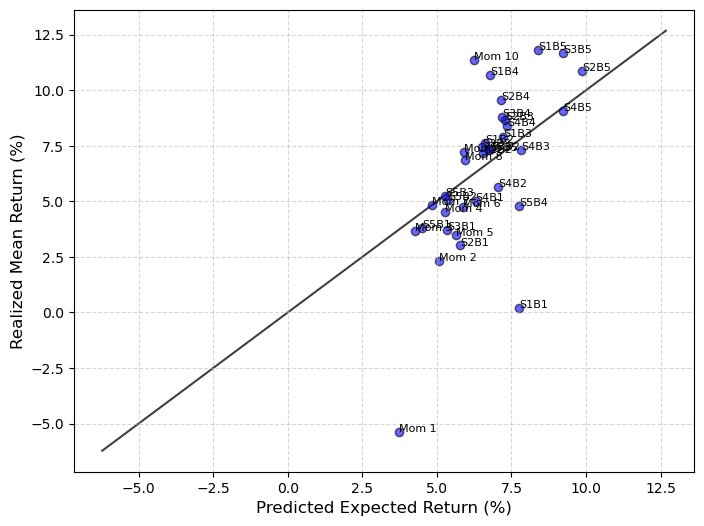

In [16]:
# ==========================================
#  生成 Figure 1 (LevFac Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['LevFac']], 
    #factors=ori_data[['No Seasonal-Adj LevFac']], 
    portfolios=df_portfolios, 
    model_name="Leverage Factor",
    ax=ax
)
plt.savefig('figures/Replication_Figure1.png', dpi=800)
plt.show()


Figure 1. Realized versus predicted mean returns: leverage factor. 

### Figure 4: Fama-French 3-Factor

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


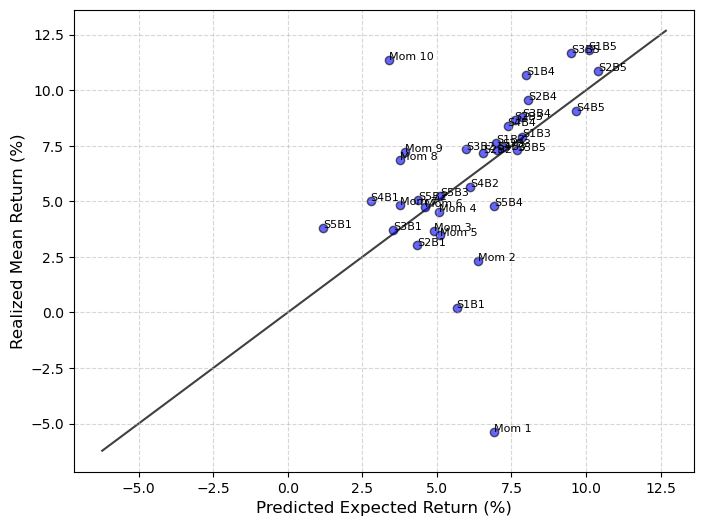

In [17]:
# ==========================================
# 3. 生成 Figure 4 (FF3 Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['Mkt-RF', 'SMB', 'HML']], 
    portfolios=df_portfolios, 
    model_name="Figure 4: Fama-French 3-Factor",
    ax=ax
)
plt.savefig('figures/Replication_Figure4.png', dpi=800)
plt.show()


Fig 4
- 图中的 25 个 Size/BM 组合（通常是蓝色点）可能还在 45度线附近
- 那 10 个 Momentum 组合（通常是红色点）会严重偏离 45度线
- 经典的 FF3 模型解释不了动量（Momentum），动量组合有巨大的定价误差（Alpha）

### Figure 5 (FF4 / Benchmark)

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


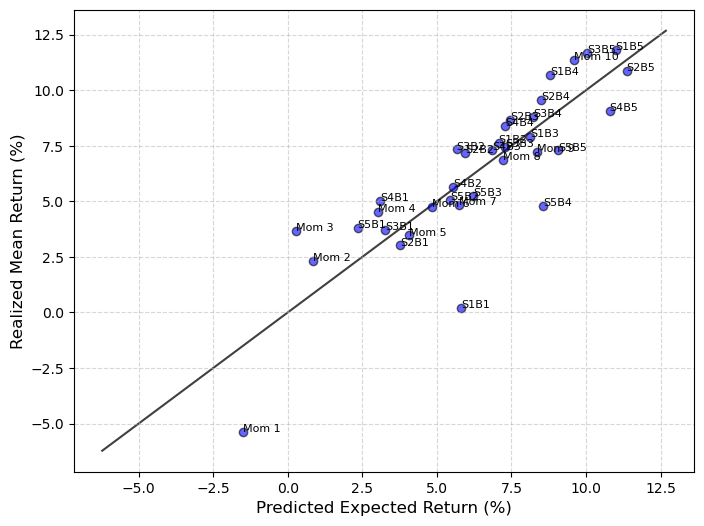

In [18]:
# ==========================================
# 4. 生成 Figure 5 (FF4 / Benchmark)
# ==========================================
# 原文用的是 5因子(含 Bond PC1)，你用 FF3 + Mom 代替
if 'Mom' in factors_annual.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_realized_vs_predicted(
        factors=factors_annual[['Mkt-RF', 'SMB', 'HML', 'Mom']], 
        portfolios=df_portfolios, 
        model_name="Figure 5: FF3 + Momentum Benchmark",
        ax=ax
    )
    plt.savefig('figures/Replication_Figure5.png', dpi=800)
    plt.show()
else:
    print("缺少 Momentum 因子，无法生成 Figure 5 的替代图。")

Fig5:
- FF3 的基础上，强行加入了一个动量因子 (Mom/UMD)
- 加入 Mom 因子后，所有点（包括动量组合）都回到了 45度线附近，拟合得很好
- 但是，这需要 4个因子，而且 Mom 因子本身是一个缺乏理论基础的“实证因子”（仅仅是因为过去涨的股票将来还会涨）
- 虽然加了 Mom 因子能解释，但模型变得很臃肿（4个因子），而且缺乏宏观经济含义。”

## 2. Time-series regressions
Replicate the results in Table VII, again ignoring the bond portfolios.

### Table VII


In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def generate_table_vii(merged_data, size_bm_cols, mom_cols, factor_name):
    """
    生成 Adrian et al. (2014) Table VII 格式的表格
    """
    # 1. 准备数据
    # 因子需要加常数项 (Intercept)
    # 原文 Table VII 说明: "Returns are reported in percent per year" -> * 400
    # "Leverage betas are multiplied by 100" -> * 100
    
    factor = merged_data[factor_name]
    X = sm.add_constant(factor)
    
    # === 部分 A: 25 Size/BM Portfolios (需要重塑为 5x5 矩阵) ===
    # 初始化 4 个 5x5 的容器
    metrics = ['E[R]', 'Beta_Lev', 't-stat', 'R2']
    results_25 = {m: np.zeros((5, 5)) for m in metrics}
    
    # 假设 size_bm_cols 的顺序是标准的: 
    # Small-Lo, Small-2, ..., Small-Hi, ME2-Lo, ..., Big-Hi
    # 行: Size (Small -> Big), 列: BM (Low -> High)
    
    print(f"正在处理 {len(size_bm_cols)} 个 Size/BM 组合...")
    
    for i, port_name in enumerate(size_bm_cols):
        # 确定矩阵坐标 (row, col)
        row = i // 5 # 0-4 (Size)
        col = i % 5  # 0-4 (BM)
        
        # 提取收益率
        y = merged_data[port_name]
        
        # 回归
        model = sm.OLS(y, X).fit()
        
        # 1. Average Return (年化百分比)
        # 注意: 你的数据如果是小数(0.01)，需要*400; 如果已经是百分比，需要*4
        # 这里假设输入是原始小数，所以 * 400
        avg_ret = y.mean() * 400 
        
        # 2. Beta (原文乘了 100)
        beta = model.params[factor_name] * 100
        
        # 3. t-stat
        t_stat = model.tvalues[factor_name]
        
        # 4. R2 (%)
        r2 = model.rsquared * 100
        
        # 填入矩阵
        results_25['E[R]'][row, col] = avg_ret
        results_25['Beta_Lev'][row, col] = beta
        results_25['t-stat'][row, col] = t_stat
        results_25['R2'][row, col] = r2

    # 将 numpy 数组转为 DataFrame 以便美观展示
    rows = ['Small', '2', '3', '4', 'Big']
    cols = ['Low', '2', '3', '4', 'High']
    dfs_25 = {k: pd.DataFrame(v, index=rows, columns=cols) for k, v in results_25.items()}

    # === 部分 B: 10 Momentum Portfolios ===
    print(f"正在处理 {len(mom_cols)} 个 Momentum 组合...")
    mom_results = []
    
    for port_name in mom_cols:
        y = merged_data[port_name]
        model = sm.OLS(y, X).fit()
        
        mom_results.append({
            'Portfolio': port_name,
            'E[R]': y.mean() * 400,
            'Beta_Lev': model.params[factor_name] * 100,
            't-stat': model.tvalues[factor_name],
            'R2 (%)': model.rsquared * 100
        })
    
    df_mom = pd.DataFrame(mom_results).set_index('Portfolio')

    return dfs_25, df_mom


In [20]:
df_portfolios = merged_data[test_assets_excess.columns] * 400
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom', 'RF']] * 400 # 因子也统一转一下方便看
print(df_portfolios.shape,factors_annual.shape)

(168, 35) (168, 5)


In [21]:
# 1. 确保你有列名列表 (根据你之前的代码)
# 假设 test_25 和 test_10 是你之前读取的原始 DataFrame
# 或者你可以直接从 merged_data.columns 里切片
cols_size_bm = test_25.columns.tolist() 
cols_mom = test_10.columns.tolist()

# 2. 运行计算
dfs_25, df_mom = generate_table_vii(merged_data, cols_size_bm, cols_mom, factor_name='LevFac')

# 3. 打印类似原文的效果
print("\n" + "="*60)
print("TABLE VII REPLICATION: Time-Series Regressions")
print("="*60)
print("\n--- Panel A: Size and Book-to-Market Portfolios ---")

print("\n1. E[R]: Average (Annualized) Returns (%)")
print(dfs_25['E[R]'].round(4))
dfs_25['E[R]'].round(4).to_csv('tables/E[R].csv')

print("\n2. Beta_Lev: Leverage Betas (x 100)")
print(dfs_25['Beta_Lev'].round(4))
dfs_25['Beta_Lev'].round(4).to_csv('tables/Beta_Lev.csv')

print("\n3. t-stats")
print(dfs_25['t-stat'].round(4))
dfs_25['t-stat'].round(4).to_csv('tables/t-stat.csv')

print("\n4. R-square (%)")
print(dfs_25['R2'].round(4))
dfs_25['R2'].round(4).to_csv('tables/R2.csv')

print("\n" + "-"*60)
print("\n--- Panel B: Momentum Portfolios ---")
print(df_mom.round(4))
df_mom.round(4).to_csv('tables/Mom.csv')
print("\n" + "="*60)

正在处理 25 个 Size/BM 组合...
正在处理 10 个 Momentum 组合...

TABLE VII REPLICATION: Time-Series Regressions

--- Panel A: Size and Book-to-Market Portfolios ---

1. E[R]: Average (Annualized) Returns (%)
          Low       2       3        4     High
Small  0.1926  7.6150  7.8876  10.6815  11.8171
2      3.0250  7.1934  8.6710   9.5757  10.8588
3      3.7203  7.3341  7.4415   8.7892  11.6778
4      5.0264  5.6487  7.3129   8.3923   9.0673
Big    3.8092  5.0818  5.2325   4.7964   7.2998

2. Beta_Lev: Leverage Betas (x 100)
           Low        2        3        4     High
Small  17.9723  15.3399  16.7231  15.7031  19.4537
2      13.3889  15.1797  16.8791  16.5895  22.9044
3      12.4085  15.8028  15.1197  16.6569  21.3899
4      14.6019  16.3555  18.1491  17.0750  21.3900
Big    10.4559  12.4874  12.2188  18.0049  15.6692

3. t-stats
          Low       2       3       4    High
Small  2.0726  2.1033  2.6029  2.6622  3.0001
2      1.8040  2.3935  3.0165  3.1757  3.7942
3      1.8198  2.7540  2.9

Table VII
- Average (Annualized) Returns，Fama-French修正了部分历史数据，造成和原文的细小差距
- Ang et al. (2006) 发现，特质波动率（Idiosyncratic Volatility）高的股票，其未来收益反而低。这与经典理论（风险越高收益越高）相悖，Fama-French 三因子模型无法解释这一现象（会有巨大的负 Alpha）。
- 测试资产：按 Beta 和特质波动率双重排序构建的 25 个投资组合。

## 3. Factor mimicking portfolio
Construct a factor mimicking portfolio as in Section IV of the article,
and replicate Figure 6 of the article.

### 6 portfolios

In [27]:
benchmark_6 = pd.read_csv('datasets/6_Portfolios_2x3.csv', skiprows=15, index_col=0)
benchmark_6.index = pd.to_datetime(benchmark_6.index, format='%Y%m')
benchmark_6 = benchmark_6 / 100.0
benchmark_6_quarterly = benchmark_6.resample('Q-JAN').apply(compound_returns)
benchmark_6_quarterly.index = benchmark_6_quarterly.index.to_period('Q')
benchmark_6_quarterly.to_csv('tables/benchmark_6_quarterly.csv')
#benchmark_6_quarterly = benchmark_6_quarterly.subtract(ff_factors_quarterly['RF'], axis=0)
benchmark_6_quarterly.head()

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_42529/2558926976.py:4: FutureWarning: 'Q-JAN' is deprecated and will be removed in a future version, please use 'QE-JAN' instead.
  benchmark_6_quarterly = benchmark_6.resample('Q-JAN').apply(compound_returns)


,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
1926Q3,0.010866,0.008807,-0.001275,0.055746,0.019060,0.020068
1926Q4,-0.059899,-0.030159,0.028654,0.004579,0.003900,0.006532
1927Q1,0.050881,0.051611,0.096298,0.059276,0.056684,0.098977
1927Q2,0.002582,0.062203,0.067192,0.096430,0.030545,0.046782
1927Q3,0.080684,0.101836,0.131888,0.140724,0.089268,0.124589


In [23]:
merged_data = pd.concat([test_assets_excess, ff_factors_quarterly, ori_data[['LevFac']], ff_Mom_quarterly, benchmark_6_quarterly], axis=1).sort_index()
merged_data_IS = merged_data.loc["1936Q1":"2009Q4"]
merged_data_IS.head(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,HML,RF,LevFac,Mom,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
1936Q1,0.835524,0.442566,0.537307,0.496995,0.968644,0.342447,0.305437,0.365609,0.356293,0.629423,...,0.255191,0.0004,NaN,-0.064346,0.251497,0.309926,0.506675,0.095955,0.224047,0.397331
1936Q2,-0.124877,-0.306076,0.054493,-0.018150,-0.168815,-0.183649,-0.076226,-0.076890,-0.102827,-0.154426,...,0.003303,0.0005,NaN,-0.037910,-0.119355,-0.062848,-0.099776,-0.028891,-0.057364,-0.049672
1936Q3,0.010408,-0.025602,0.159815,0.152606,0.131808,0.137252,0.214711,0.119834,0.099143,0.103266,...,0.038933,0.0006,NaN,0.056405,0.137204,0.131652,0.175562,0.153236,0.140494,0.198174


### LMP

根据 Adrian et al. (2014) 的方法，构建 FMP 非常简单，本质上就是一个线性回归：$$LevFac_t = \alpha + \beta' \mathbf{R}_t + \epsilon_t$$
- 因变量 ($Y$): 宏观因子 LevFac。
- 自变量 ($X$): BL, BM, BH, SL, SM, SH, Mom
- LMP 收益率: 回归的拟合值 (Fitted Values)，即 $\hat{LevFac}_t = \hat{\alpha} + \hat{\beta}' \mathbf{R}_t$。

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def construct_fmp(merged_data, benchmark_name, factor_name='LevFac'):
    """
    构建因子模仿组合 (Factor Mimicking Portfolio)
    """
    # 1. 准备数据
    # Y: 宏观因子 (LevFac)
    Y = merged_data[factor_name]
    
    # X: benchmark_name
    # 必须包含截距项
    X = merged_data[benchmark_name]
    X = sm.add_constant(X)
    
    # 2. 跑回归
    model = sm.OLS(Y, X).fit()
    
    # 3. 获取拟合值 (这就是 FMP 的收益率)
    # FMP return = Predicted values from the regression
    beta = model.params[1:]/model.params[1:].sum()
    fmp_returns = (beta * merged_data[benchmark_name]).sum(axis=1)
    print(beta)
    print(merged_data[benchmark_name])
    fmp_returns.name = 'LevFac_FMP'
    
    # 打印统计量看看
    print(f"FMP Construction R-squared: {model.rsquared:.4f}")
    #print(f"Correlation with original factor: {Y.corr(fmp_returns):.4f}")
    
    return fmp_returns,beta


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def plot_figure_6(merged_data, LevFac_LMP, scale, fig_name):
    """
    复现 Figure 6 (scale：'month' or 'quarter'):
    将季度数据转换为月度等效统计量，以匹配原文 0-5 的视觉范围。
    """
    # 1. 定义资产
    six_portfolios = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2', 'BIG HiBM']
    four_factors = ['Mkt-RF', 'SMB', 'HML', 'Mom']
    
    # 2. 数据准备
    #df_frontier = merged_data[four_factors].dropna()
    df_frontier = merged_data[six_portfolios + four_factors].dropna()
    df_p = merged_data[six_portfolios + four_factors].dropna()
    #df_frontier = merged_data[six_portfolios].dropna()
    #df_p = merged_data[six_portfolios].dropna()
    print("frontier:", df_frontier.index)
    print("frontier:", df_frontier.columns)
    print("P:", df_p.index)
    print("P:", df_p.columns)
    
    
    # 强制转小数
    if df_frontier.abs().mean().mean() > 0.1: df_frontier /= 100.0
    if df_p.abs().mean().mean() > 0.1: df_p /= 100.0
    
    # LMP
    s_lmp = LevFac_LMP.dropna()
    if s_lmp.abs().mean() > 0.1: s_lmp /= 100.0
    print('LMP:', s_lmp.index)
    # === 3. 关键转换：季度 -> 月度 ===
    # 假设数据是季度频率 (Quarterly)
    # 月度均值 = 季度均值 / 3
    # 月度波动 = 季度波动 / sqrt(3)
    if scale == 'quarter_to_month':
        scale_val = 3
        SQRT_scale = np.sqrt(3)
    elif scale == 'month':
        scale_val = 1
        SQRT_scale = 1
        
    mu_f = df_frontier.mean() / scale_val
    cov_f = df_frontier.cov() / scale_val
    
    mu_p_vec = df_p.mean() / scale_val
    cov_p_mat = df_p.cov() / scale_val
    
    # === 4. 计算 P 点 (4因子) ===
    inv_cov_p = np.linalg.inv(cov_p_mat)
    w_p = inv_cov_p @ mu_p_vec
    w_p /= w_p.sum()
    
    mu_p_val = w_p @ mu_p_vec
    std_p_val = np.sqrt(w_p @ cov_p_mat @ w_p)
    
    # === 5. 计算有效前沿 (10资产) ===
    def get_var(w): return w @ cov_f @ w
    
    # GMVP
    n_assets = len(df_frontier.columns)
    res_gmvp = minimize(get_var, np.ones(n_assets)/n_assets, 
                       constraints=({'type': 'eq', 'fun': lambda w: np.sum(w) - 1}), 
                       method='SLSQP', tol=1e-12)
    mu_gmvp = res_gmvp.x @ mu_f
    w_gmvp = res_gmvp.x

    # Upper Frontier
    def solve_for_return(target_r, start_w):
        cons = ({'type': 'eq', 'fun': lambda w: w @ mu_f - target_r},
                {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
        return minimize(get_var, start_w, constraints=cons, method='SLSQP', tol=1e-12)

    upper_returns = np.linspace(mu_gmvp, max(mu_p_val, 0.01) * 1.5, 50)
    upper_stds = []
    curr_w = w_gmvp
    
    for r in upper_returns:
        res = solve_for_return(r, curr_w)
        if res.success:
            upper_stds.append(np.sqrt(res.fun))
            curr_w = res.x
        else:
            upper_stds.append(np.nan)

    # Lower Frontier (新增：下半部分)
    # 向下计算到 -0.2% (即 -0.002)
    lower_returns = np.linspace(mu_gmvp, -0.002, 30)
    lower_stds = []
    curr_w = w_gmvp # 重置热启动

    for r in lower_returns:
        res = solve_for_return(r, curr_w)
        if res.success:
            lower_stds.append(np.sqrt(res.fun))
            curr_w = res.x
        else:
            lower_stds.append(np.nan)
            
            
    # === 6. 绘图 (Monthly Scale) ===
    plt.figure(figsize=(8, 6))
    size = 40
    # 绘图时乘 100 转为百分比
    plt.plot(np.array(upper_stds)*100, upper_returns*100, 'b-', linewidth=1)
    plt.plot(np.array(lower_stds)*100, lower_returns*100, 'b-', linewidth=1)
    
    plt.scatter([std_p_val*100], [mu_p_val*100], color='blue', marker='o', s=size, zorder=10)
    plt.text(std_p_val*100 + 0.1, mu_p_val*100, 'P', fontsize=12, color='blue')
    plt.plot([0, std_p_val*100], [0, mu_p_val*100], 'b-', linewidth=1)
    print(std_p_val, mu_p_val)
    
    if s_lmp is not None:
        mu_lmp = (s_lmp.mean() / scale_val) * 100
        std_lmp = (s_lmp.std() / SQRT_scale) * 100
        plt.scatter([std_lmp], [mu_lmp], color='red', marker='o', s=size, zorder=10)
        plt.text(std_lmp + 0.1, mu_lmp - 0.1, 'LMP', fontsize=12, color='red')
        plt.plot([0, std_lmp], [0, mu_lmp], 'b-', linewidth=1)

    # 背景资产
    for asset in df_frontier.columns:
        ser = df_frontier[asset]
        # 转为月度统计量
        a_mu = (ser.mean() / scale_val) * 100
        a_std = (ser.std() / SQRT_scale) * 100
        
        is_factor = asset in four_factors
        color = 'black' if is_factor else 'white'
        plt.scatter([a_std], [a_mu], color=color, s=size, alpha=0.7)
        if is_factor:
            plt.text(a_std + 0.1, a_mu, asset, fontsize=12, color='black')
            plt.plot([0, a_std], [0, a_mu], 'b-', linewidth=1)

    plt.xlabel('Sigma (Monthly %)', fontsize=12)
    plt.ylabel('E(R) (Monthly %)', fontsize=12)
    #plt.title('Figure 6 Replication (Monthly Scale)', fontsize=14)
    #plt.axhline(0, color='black', linewidth=1)
    
    plt.xlim(0, 5.5)  # 强制 0-5 范围
    plt.ylim(-0.2, 1.75)
    #plt.grid(True, linestyle=':', alpha=0.3)
    #plt.legend()
    #plt.tight_layout()
    plt.savefig('figures/%s.png' %fig_name, dpi=800)
    plt.show()


### Season Data

Since the Broker-Dealer leverage data from the Federal Reserve Flow of Funds is available only at a quarterly frequency, we construct the leverage factor and perform all asset pricing tests at the quarterly horizon. However, standard asset pricing literature and the original study typically report summary statistics in monthly terms. To ensure visual consistency with Figure 6 in Adrian et al. (2014), we convert our quarterly estimates into monthly equivalents for graphical representation. Specifically, we approximate the monthly expected return as $E[R_{monthly}] = E[R_{quarterly}] / 3$ and the monthly volatility as $\sigma_{monthly} = \sigma_{quarterly} / \sqrt{3}$, assuming returns are independent and identically distributed (i.i.d.) within the quarter.

SMALL LoBM   -0.006220
ME1 BM2      -1.180547
SMALL HiBM    1.117556
BIG LoBM     -0.025279
ME2 BM2       0.292114
BIG HiBM      0.434396
Mom           0.367980
dtype: float64
        SMALL LoBM   ME1 BM2  SMALL HiBM  BIG LoBM   ME2 BM2  BIG HiBM  \
1968Q1    0.108965  0.096731    0.109301 -0.030891  0.022411  0.024083   
1968Q2    0.077547  0.071003    0.069826  0.085376  0.023781  0.088148   
1968Q3    0.032689  0.070314    0.106009 -0.021578  0.040830  0.048929   
1968Q4    0.111379  0.128572    0.129890  0.038305  0.078139  0.107614   
1969Q1    0.070047  0.067168    0.049001 -0.014593  0.023342  0.022464   
...            ...       ...         ...       ...       ...       ...   
2008Q4   -0.286682 -0.219472   -0.207641 -0.227029 -0.247351 -0.226891   
2009Q1   -0.142659 -0.166372   -0.240650 -0.095245 -0.141102 -0.308551   
2009Q2    0.144289  0.140684    0.118195  0.073212  0.061189  0.106315   
2009Q3    0.169586  0.157262    0.171156  0.125330  0.137233  0.173397   
2009Q4   -

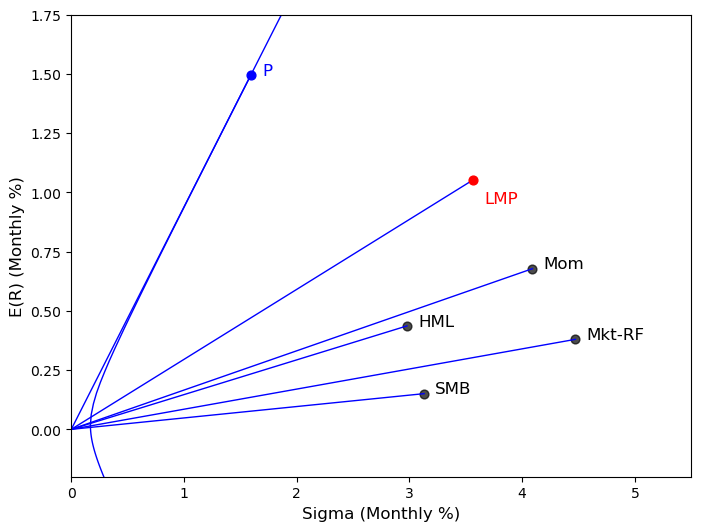

In [29]:
benchmark_name = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2',
       'BIG HiBM', 'Mom']   # 7 benchmark

# 计算 FMP 收益率
merged_data_IS = merged_data_IS.dropna()
LevFac_LMP,beta = construct_fmp(merged_data_IS, benchmark_name, factor_name='LevFac')
plot_figure_6(merged_data_IS, LevFac_LMP, scale='quarter_to_month', fig_name='IS_LMP')

Figure 6: Mean-Standard Deviation Frontier (Monthly Equivalent Scale).
The figure plots the efficient frontier constructed from the 10 benchmark assets (6 portfolios + 4 factors). Note that while the underlying estimation uses quarterly data (due to the frequency of Flow of Funds data), the axes are rescaled to represent monthly equivalent statistics ($Mean_{mo} \approx Mean_{qtr}/3$, $Std_{mo} \approx Std_{qtr}/\sqrt{3}$) to facilitate direct comparison with Adrian et al. (2014).

复现Fig6结果显示 LMP 远离 P 点（LMP 风险高、收益没那么高）

### 月度数据

In [30]:

ff_factors = pd.read_csv('datasets/F-F_Research_Data_Factors.csv', skiprows=4, index_col=0)
#ff_factors.index = pd.to_datetime(ff_factors.index, format='%Y%m')
ff_factors = ff_factors/100.0

ff_Mom = pd.read_csv('datasets/F-F_Momentum_Factor.csv', index_col=0)
#ff_Mom.index = pd.to_datetime(ff_Mom.index, format='%Y%m')
ff_Mom = ff_Mom/100.0

benchmark_6 = pd.read_csv('datasets/6_Portfolios_2x3.csv', skiprows=15, index_col=0)
#benchmark_6.index = pd.to_datetime(benchmark_6.index, format='%Y%m')
benchmark_6 = benchmark_6 / 100.0
#benchmark_6_quarterly = benchmark_6_quarterly.subtract(ff_factors_quarterly['RF'], axis=0)

merged_data = pd.concat([ff_factors, ff_Mom, benchmark_6], axis=1).sort_index().dropna()
merged_data = merged_data.loc["193601":"200912"]
merged_data.tail()

,Mkt-RF,SMB,HML,RF,Mom,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
200908,0.0333,-0.0112,0.0760,0.0001,-0.0910,0.008971,0.030191,0.080971,0.017496,0.038665,0.097581
200909,0.0408,0.0243,0.0115,0.0001,-0.0487,0.062078,0.058700,0.075823,0.033749,0.046989,0.042982
200910,-0.0253,-0.0426,-0.0417,0.0000,0.0249,-0.070829,-0.062143,-0.092954,-0.004581,-0.027868,-0.065791
200911,0.0563,-0.0250,-0.0033,0.0000,0.0039,0.020694,0.019787,0.039928,0.066612,0.047803,0.040873
200912,0.0280,0.0601,-0.0011,0.0001,0.0300,0.083539,0.079982,0.084145,0.019363,0.031505,0.016636


In [ ]:
#plot_figure_6(merged_data, LevFac_LMP, scale='month', fig_name='month_fig_6')